In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import xarray 
import pandas as pd
import numpy as np
from matplotlib import cm
# import seaborn as sns

In [3]:
f = xarray.open_dataset('../python_dt/data/air.2m.gauss.2021.nc')

In [4]:
f.air.values = (f.air-273.15).values

In [6]:
temp = pd.read_csv('../python_dt/data/Bremen_average.txt',skiprows=22,
                   delimiter=r"\s+", parse_dates=[[0,1,2]], header=None)
temp.columns = ['Date', 'Temp']
temp = temp.set_index(['Date'])

In [7]:
data_reanalysis = f.air.sel(lon=8.8, lat=53.083333, method='nearest', tolerance=5).to_pandas()

In [9]:
data_2021 = temp.loc['2021']

In [10]:
data_2021['re'] = data_reanalysis

In [13]:
data_2021.columns = ['observations', 'reanalysis']

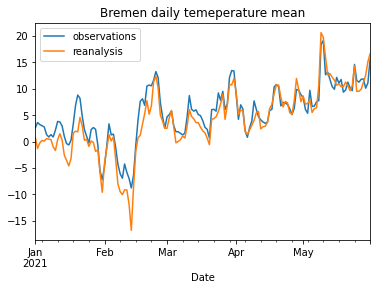

In [16]:
data_2021.plot()
plt.title('Bremen daily temeperature mean')
plt.savefig('../python_dt/images/bremen_comparison.png', dpi=100)